# Project 1: Training a Simple Neural Network with GPU

## Introduction

In this project, you will create, train, and evaluate a simple neural network using both TensorFlow and PyTorch. The objective is to ensure you are comfortable with setting up a neural network and utilizing GPU acceleration for training. You will use the MNIST dataset for this project.

## Objectives

1. Set up TensorFlow and PyTorch environments.
2. Verify GPU availability.
3. Implement a simple neural network in TensorFlow and PyTorch.
4. Train and evaluate the models.
5. Answer assessment questions.

## Instructions

Follow the steps below to complete the project. Ensure that you use a GPU to train your models.

---

### Step 1: Set Up Your Environment

First, install the necessary libraries. Run the following cell to install TensorFlow and PyTorch.


Provide snapshots from your environment showing:
1) You are using a virtual environment
2) You have installed `TensorFlow` and `PyTorch`

Google collab has been used for this project.

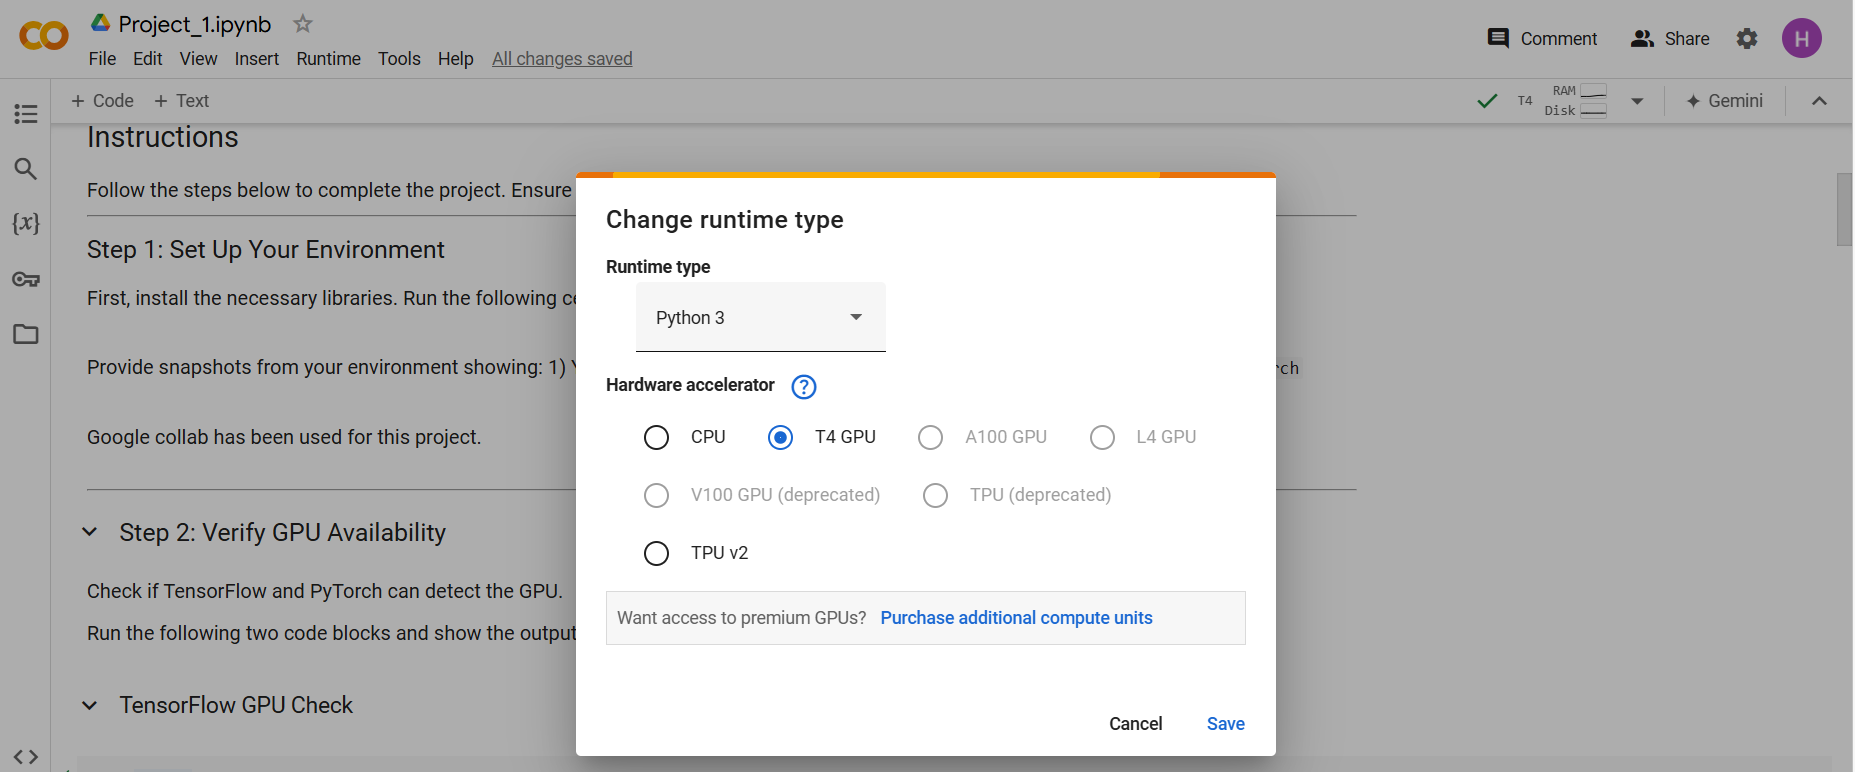

In [1]:
from IPython.display import Image

Image(filename='collab-screenshot.png')

---

### Step 2: Verify GPU Availability
Check if TensorFlow and PyTorch can detect the GPU.

Run the following two code blocks and show the output.

#### TensorFlow GPU Check

In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print("GPU is available for TensorFlow!")
else:
    print("No GPU found for TensorFlow.")


TensorFlow version: 2.15.0
GPU is available for TensorFlow!


#### PyTorch GPU Check

In [2]:
import torch

print("PyTorch version:", torch.__version__)
if torch.cuda.is_available():
    print("GPU is available for PyTorch!")
else:
    print("No GPU found for PyTorch.")


PyTorch version: 2.3.0+cu121
GPU is available for PyTorch!


---

### Step 3: Implement and Train a Simple Neural Network
#### TensorFlow Implementation
1. Load and preprocess the MNIST dataset.
2. Define the neural network model.
3. Compile the model.
4. Train the model using the GPU.
5. Evaluate the model.

You need to complete and run the code. Show the complete output.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
with tf.device('/GPU:0'):
    model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2616 - accuracy: 0.9252 - val_loss: 0.1458 - val_accuracy: 0.9575
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1191 - accuracy: 0.9646 - val_loss: 0.1060 - val_accuracy: 0.9662
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0815 - accuracy: 0.9750 - val_loss: 0.0849 - val_accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0616 - accuracy: 0.9813 - val_loss: 0.0851 - val_accuracy: 0.9744
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0857 - accuracy: 0.9745
Test accuracy: 0.9745


#### PyTorch Implementation
1. Load and preprocess the MNIST dataset.
2. Define the neural network model.
3. Define loss function and optimizer.
4. Train the model using the GPU.
5. Evaluate the model.

You need to complete and run the code. Show the complete output.


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load and preprocess the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Define the model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 18107430.75it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 488878.15it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4502416.21it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1003240.23it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/5], Loss: 0.2899
Epoch [2/5], Loss: 0.1628
Epoch [3/5], Loss: 0.0534
Epoch [4/5], Loss: 0.0680
Epoch [5/5], Loss: 0.0419
Test Accuracy: 96.86%


---
### Questions
Answer the following questions in detail.

1. What is the purpose of normalizing the input data in both TensorFlow and PyTorch implementations?
2. Explain the role of the activation function relu in the neural network.
3. Why is it important to use GPU for training neural networks?
4. Compare the training time and accuracy of the TensorFlow and PyTorch models. Which one performed better and why?


1. The input data is normalized in both Tensorflow and PyTorch implementations to scale down the pixel values of the images to a range between 0 and 1, insuring that all the pixel values in the images are within a consistent range. Not normalizing the input might produce a huge activation values, if used with ReLU, resulting in a huge loss value and gradients [1]

2. The activation function ReLU introduces non-linearity, allowing neural networks to learn complex relationships in the data. It also allows models to train faster and achieve better performance [2]. ReLU overcomes "vanishing gradient", which is a problem with traditional activation functions like sigmoid [2].

3. It is important to use GPU for training neural network because they perform technical calculations faster and with greater energy efficiency compared to CPUs for instance [3]. GPUs provide industry-leading performance for AI inference and training.

4. **Training time**:
The TensorFlow model code took about 37 seconds to execute while the PyTorch one took about a minute.

   **Accuracy**:
The TensorFlow model returned an accuracy of 0.9745 which is about **97.45%** while the PyTorch model returned an accuracy of **96.86%**.

The TensorFlow model was faster and slightly performed better in terms of accuracy compared to the PyTorch model.This could be due to a difference in the implementations of the models and the efficiency of the underlying libraries.

**Reference:**

[1] Stack Overflow (2020) Available at: https://stackoverflow.com/questions/62111708/what-is-the-significance-of-normalization-of-data-before-feeding-it-to-a-ml-dl-m

[2] Praharsha, V. (2024) Available at: https://iq.opengenus.org/relu-activation/

[3] Merritt, R. (2023) Why GPUs Are Great for AI. Available at: https://blogs.nvidia.com/blog/why-gpus-are-great-for-ai/#:~:text=The%20GPU%20software%20stack%20for%20AI%20is%20broad,wide%20array%20of%20applications%20that%20use%20accelerated%20computing.


---
### Submission
Submit a link to your completed Jupyter Notebook (e.g., on GitHub (private) or Google Colab) with all the cells executed, and answers to the assessment questions included at the end of the notebook.